In [2]:
import sys 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import warnings
import seaborn as sns
# To suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

In [4]:
%load_ext autoreload
%autoreload 2
from database import Magneticum
from relation import Scaling
from relation import Distribution
from relation import Analysis
from relation import RandomForest

In [5]:
def data_manupulation(df):
    dff = df.copy()
    dff.Vnet = dff.Vnet.apply(lambda x: x/1e5)
    dff.Vz = dff.Vz.apply(lambda x: x/1e5)
    dff.Mstar = dff.Mstar.apply(lambda x: np.log(x))
    ss = StandardScaler()
    dff['Vnet'] = ss.fit_transform(dff['Vnet'].values.reshape(-1,1))
    dff['Vz'] = ss.fit_transform(dff['Vz'].values.reshape(-1,1))
    dff['Mstar'] = ss.fit_transform(dff['Mstar'].values.reshape(-1,1))
    dff['M'] = ss.fit_transform(dff['M'].values.reshape(-1,1))
    dff['Yksz'] = ss.fit_transform(dff['Yksz'].values.reshape(-1,1))
    return dff

In [6]:
best = {'max_depth': 50,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [7]:
Magneticum.redshift_snapshot()

{'140': 0.032637493,
 '136': 0.066340191,
 '132': 0.10114286,
 '128': 0.1370814,
 '124': 0.17419289,
 '120': 0.2125156,
 '116': 0.25208907,
 '112': 0.29295412,
 '108': 0.3351529,
 '104': 0.37872894,
 '100': 0.4237272,
 '096': 0.47019408,
 '092': 0.51817753,
 '088': 0.56772704,
 '084': 0.61889372,
 '080': 0.67173035,
 '076': 0.72629144,
 '072': 0.78263327,
 '068': 0.84081395,
 '064': 0.9008935,
 '060': 0.9629339,
 '056': 1.0433395,
 '052': 1.1788951,
 '048': 1.3234434,
 '044': 1.4775811,
 '040': 1.7063538,
 '036': 1.9800821,
 '032': 2.3346161,
 '028': 2.79173}

In [8]:
snaps = ['140','132','120','096','076','060']

In [9]:
z = [Magneticum.redshift_snapshot(snap) for snap in snaps]

In [10]:
r2_scores = []
rmse_scores = []
for snap in snaps:
    a = Analysis(50,snap,'')
    df = a.get_dataframe()
    #df = data_manupulation(df)
    rf = RandomForest(df)
    rf.split_data(test_size=0.8)
    rf.best_hyperparameters = best
    rf.fit_with_hyperparameters(['M'],'Yksz')
    rf.fit_with_hyperparameters(['M','Vz'],'Yksz')
    rf.fit_with_hyperparameters(['M','Mstar'],'Yksz')
    rf.fit_with_hyperparameters(['M','Mstar','Vz'],'Yksz')
    r2_scores.append(rf.r2_scores)
    rmse_scores.append(rf.rmse_scores)


In [11]:
nsamples = []
for snap in snaps:
    a = Analysis(50,snap,'')
    df = a.get_dataframe()
    nsamples.append(len(df))

Text(0, 0.5, 'Number of samples')

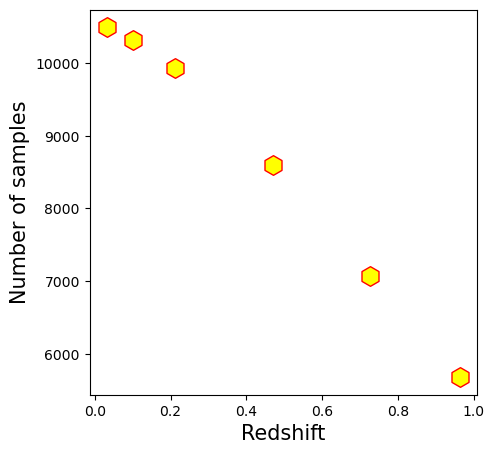

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(z,nsamples,s=200,color='Yellow',marker='h',edgecolor='r')
plt.xlabel('Redshift', fontsize=15)
plt.ylabel('Number of samples', fontsize=15)

In [13]:
models = ['M','M_Vz','M_Mstar','M_Mstar_Vz']

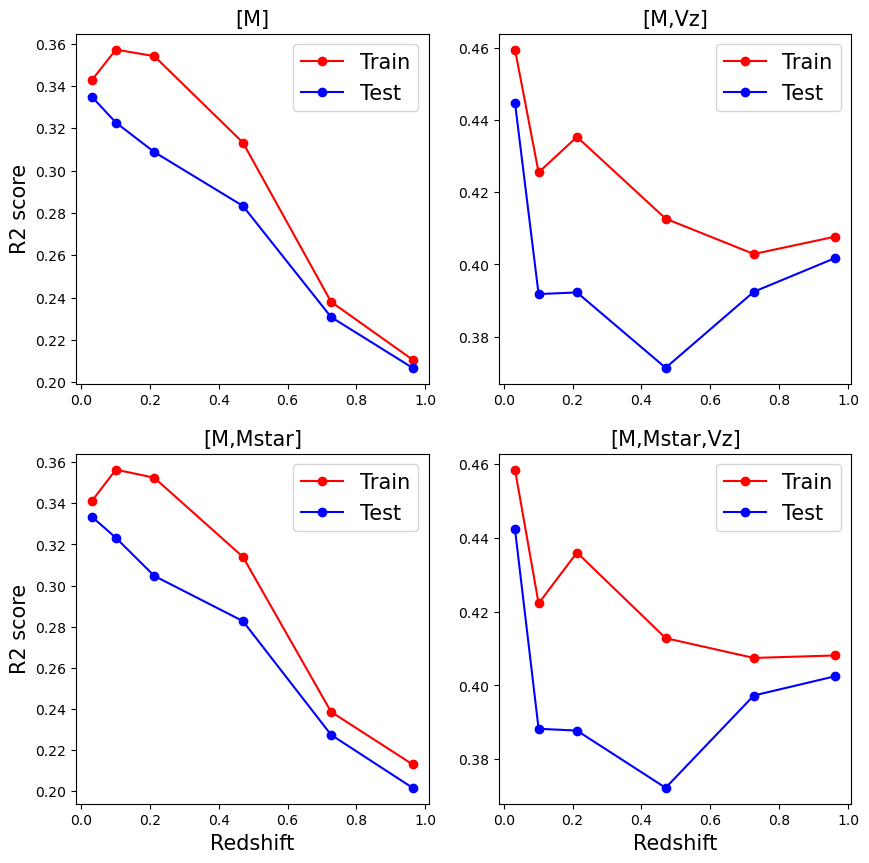

In [14]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    model = models[i]
    mname = '['+model.replace('_', ',')+']'
    r2_train = []
    r2_test = []
    for j in range(len(z)):
        r2_test.append(r2_scores[j][model]['test_r2'])
        r2_train.append(r2_scores[j][model]['train_r2'])
    plt.plot(z,r2_train,'o-',label='Train',color='r')
    plt.plot(z,r2_test,'o-',label='Test',color='b')
    if i in [2,3]:
        plt.xlabel('Redshift', fontsize=15)
    if i in [0,2]:
        plt.ylabel('R2 score', fontsize=15)
    plt.legend(loc='best',fontsize=15)
    plt.title(mname,fontsize=15)

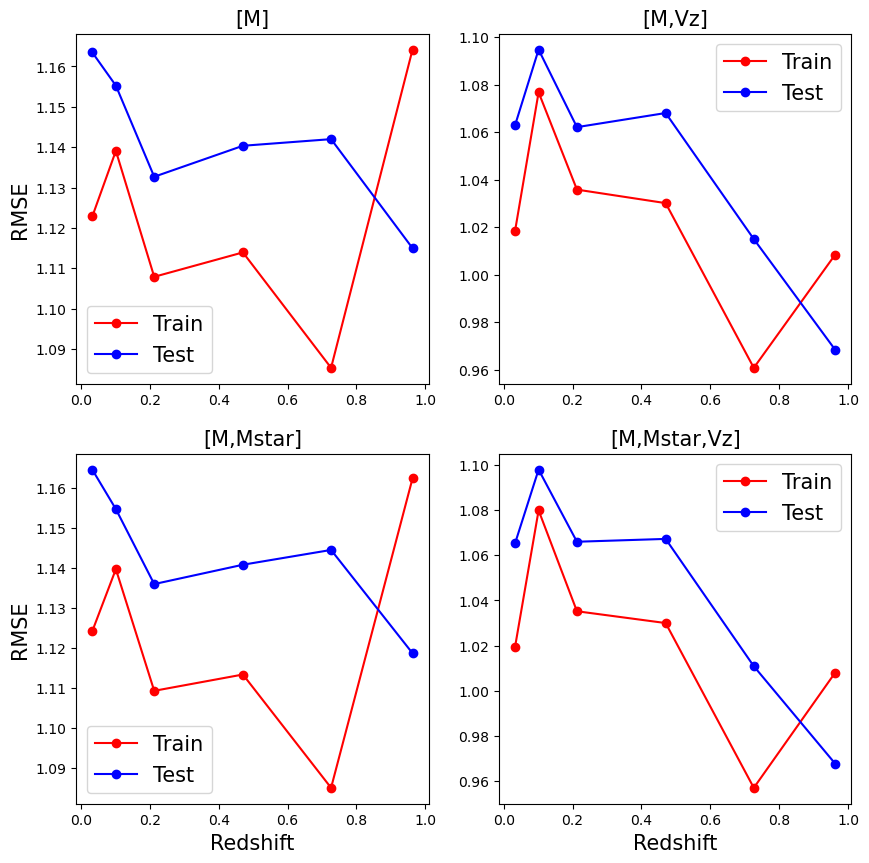

In [15]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    model = models[i]
    mname = '['+model.replace('_', ',')+']'
    rmse_train = []
    rmse_test = []
    for j in range(len(z)):
        rmse_test.append(rmse_scores[j][model]['test_rmse'])
        rmse_train.append(rmse_scores[j][model]['train_rmse'])
    plt.plot(z,rmse_train,'o-',label='Train',color='r')
    plt.plot(z,rmse_test,'o-',label='Test',color='b')
    if i in [2,3]:
        plt.xlabel('Redshift', fontsize=15)
    if i in [0,2]:
        plt.ylabel('RMSE', fontsize=15)
    plt.legend(loc='best',fontsize=15)
    plt.title(mname,fontsize=15)